# Titanic Survival Prediction

In this machine learning project, I have collected the dataset from Kaggle and I will be using Machine Learning to make
predictions on whether a person is surviving on Titanic or not.

# Import necessary file

Let's first import all the necessary libraries. I'll use numpy and pandas to start with.


In [130]:
import pandas as pd
import numpy as np

## Importing the Dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file dataset.csv. I'll use the pandas  read_csv method to read the dataset.

In [131]:
data = pd.read_csv('train.csv')

In [132]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [145]:
def gender_converter(x):
    if 'x'=='male':
        return 0
    else:
        return 1
    

In [146]:
data['Sex'] = data['Sex'].apply(gender_converter)

In [147]:
data['Sex']

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
861    1
862    1
863    1
864    1
865    1
866    1
867    1
868    1
869    1
870    1
871    1
872    1
873    1
874    1
875    1
876    1
877    1
878    1
879    1
880    1
881    1
882    1
883    1
884    1
885    1
886    1
887    1
888    1
889    1
890    1
Name: Sex, Length: 891, dtype: int64

## Import the necessary file for visualization

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
sns.set()

## Creating heatmap

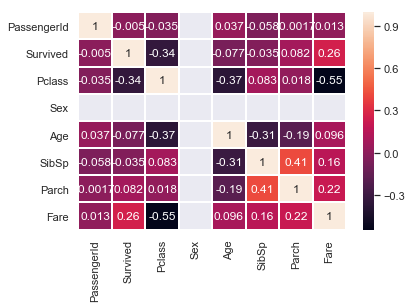

In [150]:
sns.heatmap(data.corr(), annot=True, linewidth=1,
           linecolor='w')

## Training our dataset

In [75]:
training_data = data[['PassengerId', 'Pclass', 'Fare']]

In [76]:
output_data = data['Survived']

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X, x_test, Y, y_test = train_test_split(training_data,
                                       output_data,
                                       test_size=0.3,
                                       random_state =49)

## Logisitic Regression algorthim

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
model = LogisticRegression()

In [81]:
model.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
predictions = model.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [84]:
confusion_matrix(predictions, y_test)

array([[159,  48],
       [ 19,  42]], dtype=int64)

In [85]:
score = accuracy_score(predictions, y_test)

In [86]:
score

0.75

## Using KNN Algorthim

K Neighbors Classifier
The classification score varies based on different values of neighbors and check when do I achieve the best score

In [87]:
from sklearn.neighbors import KNeighborsClassifier

In [88]:
knn_model = KNeighborsClassifier()

In [89]:
knn_model.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [90]:
knn_predictions = knn_model.predict(x_test)

In [91]:
knn_score = accuracy_score(knn_predictions, y_test)

In [92]:
knn_score

0.6567164179104478

## Grid Search algorthim

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameters = {'n_neighbors': [5,10,15,13]}

In [95]:
grid_search =GridSearchCV(KNeighborsClassifier(),param_grid =parameters)

In [96]:
grid_search.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [5, 10, 15, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [97]:
grid_search.best_params_

{'n_neighbors': 10}

In [98]:
grid_search.best_score_

0.637239165329053

## Decision tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dt_model = DecisionTreeClassifier()

In [101]:
dt_model.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [102]:
dt_predictions = dt_model.predict(x_test)

In [103]:
dt_score= accuracy_score(knn_predictions, y_test)

In [104]:
dt_score

0.6567164179104478

## SVM & SVC 

In [105]:
from sklearn.svm import SVC

In [106]:
svm_model =SVC()

In [107]:
svm_model.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [108]:
svm_predictions =svm_model.predict(x_test)

In [109]:
svm_score = accuracy_score(svm_predictions, y_test)

In [110]:
svm_score

0.6268656716417911

## SVM using Grid search

In [111]:
svm_parameters = {
    'C' : [0.01, 0.1, 1, 10, 100],
}

In [112]:
grid_search_svm =GridSearchCV(SVC(kernel ='rbf'),param_grid =svm_parameters)

In [113]:
grid_search_svm.fit(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [114]:
grid_search_svm.best_params_

{'C': 0.01}

In [115]:
grid_search_svm.best_score_

0.5955056179775281

In [116]:
test_data = pd.read_csv('test.csv')

In [117]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [118]:
test_data = test_data[['PassengerId','Pclass','Fare']]

In [119]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [120]:
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())

In [121]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [122]:
test_predictions =model.predict(test_data)

In [123]:
test_predictions[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [124]:
test_submission = {
    'PassengerId':test_data['PassengerId'],
    'survived':test_predictions
}

In [125]:
test_submission =pd.DataFrame(test_submission)

In [126]:
test_submission - test_submission.set_index('PassengerId')

,PassengerId,survived
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


In [127]:
test_submission.head()

,PassengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [128]:
test_submission = test_submission.set_index('PassengerId')

In [129]:
test_submission.to_csv('submission.csv')

# Conclusion

In this project, I used Machine Learning to predict whether a person is surviving in Titanic or not. After importing the data, I analysed it using heatmap. Then, I applied four Machine Learning algorithms,Logistic Regression, K Neighbors Classifier, Support Vector Classifier, Decision Tree Classifier and SVm using Grid Search algorthim. I varied parameters across each model to improve their scores. In the end, Logistic Regression achieved the highest score of 75%